## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('credit_scoring_eng.csv')

In [3]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
5,0,-926.185831,27,masters degree,0,civil partnership,1,M,partner,0,255763.565419,purchase of the house
6,0,-2879.202052,43,masters degree,0,married,0,F,partner,0,240525.971920,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,135823.934197,education
8,2,-6929.865299,35,MASTERS DEGREE,0,civil partnership,1,F,employee,0,95856.832424,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,144425.938277,purchase of the house for my family


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Conclusion

Just from examining the first 10 rows of the data, there are two big questions that arise. First, there are many entries with negative values in the "days_employed" column. Second, the "purpose" column will definitely need some further exploration, as it appears there are some inconsistences in responses here, which may require extensive preprocessing. 

There are some other adjustments that need to be made to the data as well. One is setting "education" values all to lowercase so they can be better grouped. Another is the "dob_years" column, which would be more appropriately named "age." And, exploring both education and family_status repeat columns will be an important preprocessing step. Finally, both "total_income" and "days_employed" are missing data points, which will require some investigation. 

### Step 2. Data preprocessing

### Processing missing values

In [5]:
null_income = df[df['total_income'].isnull()]

In [6]:
print(null_income)

       children  days_employed  dob_years            education  education_id  \
12            0            NaN         65  secondary education             1   
26            0            NaN         41  secondary education             1   
29            0            NaN         63  secondary education             1   
41            0            NaN         50  secondary education             1   
55            0            NaN         54  secondary education             1   
...         ...            ...        ...                  ...           ...   
21489         2            NaN         47  Secondary Education             1   
21495         1            NaN         50  secondary education             1   
21497         0            NaN         48       MASTERS DEGREE             0   
21502         1            NaN         42  secondary education             1   
21510         2            NaN         28  secondary education             1   

           family_status  family_status

In [7]:
df.groupby('income_type').describe()

children                                      \
                               count      mean       std  min   25%  50%   
income_type                                                                
civil servant                 1459.0  0.622344  1.113242 -1.0  0.00  0.0   
employee                     11119.0  0.641784  1.448530 -1.0  0.00  0.0   
entrepreneur                     2.0  0.000000  0.000000  0.0  0.00  0.0   
partner                       5085.0  0.598623  1.483968 -1.0  0.00  0.0   
paternity / maternity leave      1.0  2.000000       NaN  2.0  2.00  2.0   
retiree                       3856.0  0.132002  1.014271 -1.0  0.00  0.0   
student                          1.0  0.000000       NaN  0.0  0.00  0.0   
unempoyed                        2.0  0.500000  0.707107  0.0  0.25  0.5   

                                        days_employed                 ...  \
                              75%   max         count           mean  ...   
income_type                                                           ...   
civil servant                1.00  20.0        1312.0   -3399.896902  ...   
employee                     1.00  20.0       10014.0   -2326.499216  ...   
entrepreneur                 0.00   0.0           1.0    -520.848083  ...   
partner                      1.00  20.0        4577.0   -2111.524398  ...   
paternity / maternity leave  2.00   2.0           1.0   -3296.759962  ...   
retiree                      0.00  20.0        3443.0  365003.491245  ...   
student                      0.00   0.0           1.0    -578.751554  ...   
unempoyed                    0.75   1.0           2.0  366413.652744  ...   

                             debt      total_income                 \
                              75%  max        count           mean   
income_type                                                          
civil servant                0.00  1.0       1312.0  170898.309923   
employee                     0.00  1.0      10014.0  161380.260488   
entrepreneur                 0.00  0.0          1.0  499163.144947   
partner                      0.00  1.0       4577.0  202417.461462   
paternity / maternity leave  1.00  1.0          1.0   53829.130729   
retiree                      0.00  1.0       3443.0  137127.465690   
student                      0.00  0.0          1.0   98201.625314   
unempoyed                    0.75  1.0          2.0  131339.751676   

                                                                          \
                                       std            min            25%   
income_type                                                                
civil servant                 96878.763554   29200.077193  105294.668418   
employee                      91322.514795   21367.648356  102795.633631   
entrepreneur                           NaN  499163.144947  499163.144947   
partner                      130481.095793   28702.812889  125887.745820   
paternity / maternity leave            NaN   53829.130729   53829.130729   
retiree                       80246.953231   20667.263793   82881.443465   
student                                NaN   98201.625314   98201.625314   
unempoyed                    100950.466876   59956.991984   95648.371830   

                                                                         
                                       50%            75%           max  
income_type                                                              
civil servant                150447.935283  209173.052434  9.104515e+05  
employee                     142594.396847  196828.082600  1.726276e+06  
entrepreneur                 499163.144947  499163.144947  4.991631e+05  
partner                      172357.950966  243907.839199  2.265604e+06  
paternity / maternity leave   53829.130729   53829.130729  5.382913e+04  
retiree                      118514.486412  169700.433010  7.351033e+05  
student                       98201.625314   98201.625314  9.820163e+

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21524
Data columns (total 12 columns):
children            19351 non-null int64
days_employed       19351 non-null float64
dob_years           19351 non-null int64
education           19351 non-null object
education_id        19351 non-null int64
family_status       19351 non-null object
family_status_id    19351 non-null int64
gender              19351 non-null object
income_type         19351 non-null object
debt                19351 non-null int64
total_income        19351 non-null float64
purpose             19351 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 1.9+ MB


### Conclusion

Due to the nature of the data, I wanted to see whether it was appropriate to add in values for the income or delete null data. Exploring the data, I find the standard deviation for income, even among similar income types, is quite wide. With that in mind, using an average to fill this data could still create misleading information. Since null data makes up only about 10% of all data, it may be more appropriate to simply drop all rows with null values. 

A big reason for this is also due to the financial variability. Though visible data is limited, we can quickly see a wide range of age, purpose, and other variability in these missing data points. This leads me to believe putting in a fill value for these missing data points could do more harm than good. 

In this case, it appears all the rows with missing "total_income" are also missing "days_employed." To test this, I will simply drop null values rather than replace. If this sets the data to 19315 points for every category, it should present enough information while eliminating potentially misleading data. 

In a real-world scenario, I would follow up with the data provider on this. Both income and employment longevity are necessary information for normal loans, so I expect there might have been a mistake somewhere here. I.E. the data should be on file for these customers or they should never have gotten a loan. 

### Data type replacement

In [10]:
df['days_employed'] = df['days_employed'].astype(int)

In [11]:
df['total_income'] = df['total_income'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21524
Data columns (total 12 columns):
children            19351 non-null int64
days_employed       19351 non-null int32
dob_years           19351 non-null int64
education           19351 non-null object
education_id        19351 non-null int64
family_status       19351 non-null object
family_status_id    19351 non-null int64
gender              19351 non-null object
income_type         19351 non-null object
debt                19351 non-null int64
total_income        19351 non-null int32
purpose             19351 non-null object
dtypes: int32(2), int64(5), object(5)
memory usage: 1.8+ MB


In [13]:
df['days_employed'] = df['days_employed'].abs()

In [14]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,masters degree,0,married,0,F,employee,0,253875,purchase of the house
1,1,4024,36,secondary education,1,married,0,F,employee,0,112080,car purchase
2,0,5623,33,Secondary Education,1,married,0,M,employee,0,145885,purchase of the house
3,3,4124,32,secondary education,1,married,0,M,employee,0,267628,supplementary education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,158616,to have a wedding


### Conclusion

In a real data situation, the "days_employed" would warrant some follow-up with whomever provided the data. Were the negative values a mistake in data entry? Why are their long decimals (even if measuring fractions of a day, the seemingly random numbers here are dubious). 

In this case, I am assuming the negative numbers are meant to be positive. Additionally, I changed the data type to integer because we are only interested in full work days. 

Beyond this column, I also thought it appropriate to round total income to an integer as well. In loan situations, calculating down to a fraction of a cent seems unecessary. 

### Processing duplicates

In [15]:
df['education_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [16]:
edu_2 = df[df['education_id'] == 2]

In [17]:
edu_3 = df[df['education_id'] == 3]

In [18]:
edu_4 = df[df['education_id'] == 4]

In [19]:
print(edu_2.head(1))

    children  days_employed  dob_years        education  education_id  \
13         0           1846         54  bachelor degree             2   

   family_status  family_status_id gender income_type  debt  total_income  \
13       married                 0      F    employee     0        130458   

         purpose  
13  car purchase  


In [20]:
print(edu_3.head(1))

    children  days_employed  dob_years          education  education_id  \
31         0           1682         47  primary education             3   

   family_status  family_status_id gender income_type  debt  total_income  \
31       married                 0      F    employee     0        275485   

    purpose  
31  housing  


In [21]:
print(edu_4.head(1))

      children  days_employed  dob_years        education  education_id  \
2963         0         337584         69  Academic Degree             4   

     family_status  family_status_id gender income_type  debt  total_income  \
2963       married                 0      M     retiree     0         98752   

                          purpose  
2963  buy residential real estate  


In [22]:
df['family_status_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [23]:
famstat_2 = df[df['family_status_id'] == 2]

In [24]:
famstat_3 = df[df['family_status_id'] == 3]

In [25]:
famstat_4 = df[df['family_status_id'] == 4]

In [26]:
print(famstat_2.head(1))

    children  days_employed  dob_years            education  education_id  \
18         0         400281         53  secondary education             1   

      family_status  family_status_id gender income_type  debt  total_income  \
18  widow / widower                 2      F     retiree     0         56823   

                     purpose  
18  buying a second-hand car  


In [27]:
print(famstat_3.head(1))

    children  days_employed  dob_years            education  education_id  \
19         0          10038         48  SECONDARY EDUCATION             1   

   family_status  family_status_id gender income_type  debt  total_income  \
19      divorced                 3      F    employee     0        242831   

              purpose  
19  buying my own car  


In [28]:
print(famstat_4.head(1))

    children  days_employed  dob_years            education  education_id  \
24         1         338551         57  secondary education             1   

   family_status  family_status_id gender income_type  debt  total_income  \
24     unmarried                 4      F     retiree     0        290547   

                                          purpose  
24  transactions with the residential real estate  


In [29]:
df = df.drop(columns=['education', 'family_status'])

In [30]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,1.935100e+04
mean,0.537388,66914.229601,43.255336,0.819079,0.972249,0.081184,1.674218e+05
std,1.371408,139030.879867,12.579170,0.550104,1.420596,0.273125,1.029716e+05
min,-1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,926.500000,33.000000,1.000000,0.000000,0.000000,1.030530e+05
50%,0.000000,2194.000000,42.000000,1.000000,0.000000,0.000000,1.450170e+05
75%,1.000000,5537.000000,53.000000,1.000000,1.000000,0.000000,2.034345e+05
max,20.000000,401755.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [31]:
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [32]:
df[df['gender'] == 'XNA'].head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358,24,2,1,XNA,partner,0,203905,buy real estate


In [33]:
df['income_type'].unique()

array(['employee', 'retiree', 'partner', 'civil servant', 'unempoyed',
       'student', 'entrepreneur', 'paternity / maternity leave'],
      dtype=object)

In [34]:
df[df['income_type'] == 'unempoyed'].head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,337524,31,1,0,M,unempoyed,1,59956,buying property for renting out
14798,0,395302,45,0,1,F,unempoyed,0,202722,property renovation


In [35]:
df.duplicated().sum()

0

As noted when observing the data, there were various columns that were essentially duplicates. Here we simply dropped those duplicate columns. 

I decided to keep education_id rather than education. In a real-world scenario, it would be easy enough to note what each number means in context. For my purpose, I had to determine how many different values there were and what each value was, which meant extra lines of code. In this case, I'll note here: 0 = Master's Degree, 1 = Secondary Education, 2 = Bachelor's Degree, 3 = Primary Education, 4 = Academic Degree. Having these as numeric values opens up more potential for data anaylsis down the road, including the training of a machine learning model to predict risk. 

In the same way, I dropped the family_status and kept the family_status_id column. The values on this are: 0 = Married, 1 = Civil Partnership, 2 = Widow/Widower, 3 = Divorced, 4 = Unmarried.   

Beyond these, I explored the descriptive statistics for the numerical variables to see what we are working with. Next, I checked the unique entries for gender and doubled checked income_type (in case dropping nulls affected this). I notice "unempoyed" is still a value, which seems odd as you wouldn't expect someone unemployed would be offered a loan. Further, it seems these listing both have enormously large "days_employed." Overall, it seems thre is an error in these two entries, something I would want to check with the data provider on. 

Next, I see there is just one row of data for the gender as "XNA." But, that appears valid -likely just someone who didn't identify their gender; still worthy of follow-up with data provider if able. 

Finally, I also checked for duplicate rows and found none. 

### Lemmatization

In [36]:
import nltk

In [37]:
from nltk.stem import WordNetLemmatizer

In [38]:
wnl = WordNetLemmatizer()

In [39]:
df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car',
       'transactions with the residential real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'getting an education', 'second-hand car purchase', 'car',
       'wedding ceremony', 'to get asupplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'building a real estate', 'property renovation',
 

In [40]:
df['purpose'] = df['purpose'].replace('going to university', 'education')

In [41]:
purposes = df['purpose'].tolist()

In [42]:
def find_purpose(purposes):
    new_cats = ['house', 'car', 'education', 'wedding', 'housing', 'estate', 'property', 'educated']
    new_list = []
    for purpose in purposes:
        for word in purpose.split(' '):
            lemmas = wnl.lemmatize(word, pos='n')
            if lemmas in new_cats:
                new_list.append(lemmas)
    return new_list

In [43]:
new_purpose = find_purpose(purposes)

In [44]:
print(len(new_purpose))

19351


In [45]:
df['purpose'] = new_purpose

In [46]:
print(df.head(10))

   children  days_employed  dob_years  education_id  family_status_id gender  \
0         1           8437         42             0                 0      F   
1         1           4024         36             1                 0      F   
2         0           5623         33             1                 0      M   
3         3           4124         32             1                 0      M   
4         0         340266         53             1                 1      F   
5         0            926         27             0                 1      M   
6         0           2879         43             0                 0      F   
7         0            152         50             1                 0      M   
8         2           6929         35             0                 1      F   
9         0           2188         41             1                 0      M   

  income_type  debt  total_income    purpose  
0    employee     0        253875      house  
1    employee     0      

### Conclusion

This was all about the "purpose" column. Until we could narrow this down to fewer purposes and eliminate "duplicate" entries with different wording, we would not be able to fully understand the data. 

In our initial data observation, I noticed there was some discrepency within the "house" category. Specifically, "housing transactions" vs. "purchasing a house." Knowing that, my first step here was to determine what other "unique" purposes people listed, which is why I started by looking at unique entries. From there, I discovered a greater number of unique entries than expected. And, without being able to get clarification from the data provider, I believe the best way to organize is into four broad categories: education, housing, car, wedding. 

Out of these categories, I know lemmatization can help with most of it, but the entries for "going to university" will overlap with "university eduction." For this reason, I changed all entries with this as the listed purpose to simply "education." From there, I can convert the column to a list, run a custom function to lemmatize the list, and then adjust the column to contain the new list values. 

Now that the "purpose" column is better organized, I can proceed to proper categorization of the data. After all, I still have various listings for the same purpose -time to hone that in. 

### Categorizing Data

In [47]:
def purpose_category(purpose):
    if purpose == 'car':
        return 1
    if purpose == 'house' or purpose =='housing' or purpose == 'property' or purpose == 'estate':
        return 2
    if purpose == 'educated' or purpose == 'education':
        return 3
    if purpose == 'wedding':
        return 4

In [48]:
df['purpose'] = df['purpose'].apply(purpose_category)

In [49]:
print(df['total_income'].describe() / 1000)

count      19.351000
mean      167.421802
std       102.971571
min        20.667000
25%       103.053000
50%       145.017000
75%       203.434500
max      2265.604000
Name: total_income, dtype: float64


In [50]:
def income_level(income):
    if income <= 50000:
        return 'Bottom Income'
    if income <= 100000:
        return 'Low Income'
    if income <= 150000: 
        return 'Middle Income'
    if income <= 200000:
        return 'Upper Income'
    if income > 200000:
        return 'Top Income'

In [51]:
df['income_category'] = df['total_income'].apply(income_level)

In [52]:
def children_bool(children):
    if children == 0:
        return 0
    if children > 0:
        return 1
    return 0

In [53]:
df['has_kids'] = df['children'].apply(children_bool)

In [54]:
print(df.head())

   children  days_employed  dob_years  education_id  family_status_id gender  \
0         1           8437         42             0                 0      F   
1         1           4024         36             1                 0      F   
2         0           5623         33             1                 0      M   
3         3           4124         32             1                 0      M   
4         0         340266         53             1                 1      F   

  income_type  debt  total_income  purpose income_category  has_kids  
0    employee     0        253875        2      Top Income         1  
1    employee     0        112080        1   Middle Income         1  
2    employee     0        145885        2   Middle Income         0  
3    employee     0        267628        3      Top Income         1  
4     retiree     0        158616        4    Upper Income         0  


### Conclusion

Since we decided to keep only the "education_id" column, we made it so the only real point of confusion could fall in the purpose column. From there, our lemmatized "purpose" column was the next area of focus -we wanted to make sure we were not repeating purposes with different wording and we wanted the ability to draw useful comparisons, which is why I standarized it to be numerical. 

1 = Car, 2= House, 3 = Education, 4 = Wedding

Beyond those columns, we want to look at income and then marital status. We already know the basic marital status categories. However, for income we want to categorize our data so we can draw from ranges of income rather than just one specific income amount. This is why I viewed summary statistics for the income column. From there, I split the data accordingly into an income_category. 

For initial observations here, I also wanted to narrow down children into a simple "yes/no" column to get more broad data.

### Step 3. Answer these questions

- Is there a relation between having kids and repaying a loan on time?

In [55]:
from scipy.stats.stats import pearsonr

In [56]:
import matplotlib.pyplot as plt

In [57]:
pearsonr(df['has_kids'], df['debt'])

(0.03290172809317171, 4.698174866931638e-06)

In [58]:
pearsonr(df['children'], df['debt'])

(0.021352951377882793, 0.002973053486565005)

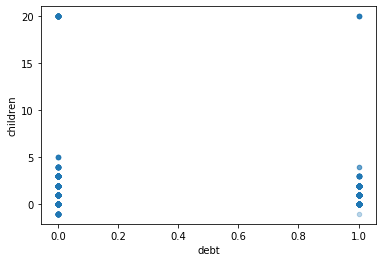

In [59]:
df.plot('debt', 'children', kind='scatter', alpha=0.3)

In [60]:
pd.pivot_table(df, index='children', values='debt', aggfunc=sum)

,debt
children,
-1,1
0,952
1,408
2,177
3,22
4,3
5,0
20,8


In [61]:
no_kids = df[df['children'] == 0].count()

In [62]:
print(952 / no_kids[1])

0.07490165224232888


In [63]:
one_kid = df[df['children'] == 1].count()

In [64]:
print(408 / one_kid[1])

0.0939442781487451


In [65]:
two_kids = df[df['children'] == 2].count()

In [66]:
print(177 / two_kids[1])

0.09562398703403566


In [67]:
three_kids = df[df['children'] == 3].count()

In [68]:
print(22 / three_kids[1])

0.07482993197278912


In [69]:
four_kids = df[df['children'] == 4].count()

In [70]:
print(3 / four_kids[1])

0.08823529411764706


In [71]:
five_kids = df[df['children'] == 5].count()

In [72]:
print(five_kids[1])

8


In [73]:
twenty_kids = df[df['children'] == 20].count()

In [74]:
print(8 / twenty_kids[1])

0.11940298507462686


In [75]:
print(twenty_kids[1])

67


### Conclusion

At first, there doesn't appear to be a measurable relationship between having children and repaying loans on time. This is true both in checking as a simple "yes/no" of whether they have children and also in looking at the number of children they have. We can see this both with the pearson correlation and with the scatterplot. 

However, upon looking further, it seems there is some connection as seen in the pivot table. Here we see those with 0 children have defaulted more than those with children. But, if we examine these results as a ratio, we realize that's because most loan applicants had no children. Looking further, people with 1-2 kids tend to have a much higher default rate. And, while the number of data points is low, those with 20 reported kids had the highest default rate. 

- Is there a relation between marital status and repaying a loan on time?

In [76]:
pearsonr(df['family_status_id'], df['debt'])

(0.022322890477893563, 0.001899729578767337)

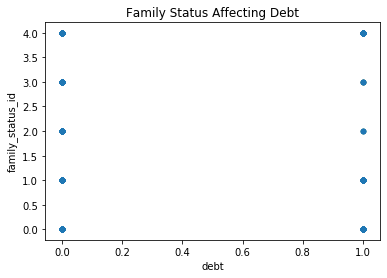

In [77]:
df.plot('debt', 'family_status_id', kind='scatter', title='Family Status Affecting Debt', alpha=0.1)

In [78]:
pd.pivot_table(df, index='family_status_id', values='debt', aggfunc=sum,)

,debt
family_status_id,
0,846
1,339
2,56
3,76
4,254


In [79]:
married = df[df['family_status_id'] == 0].count()

In [80]:
print(846 / married[1])

0.07592210356277483


In [81]:
civil_part = df[df['family_status_id'] == 1].count()

In [82]:
print(339 / civil_part[1])

0.09076305220883533


In [83]:
widow = df[df['family_status_id'] == 2].count()

In [84]:
print(56 / widow[1])

0.06473988439306358


In [85]:
divorced = df[df['family_status_id'] == 3].count()

In [86]:
print(76 / divorced[1])

0.07017543859649122


In [87]:
unmarried = df[df['family_status_id'] == 4].count()

In [88]:
print(254 / unmarried[1])

0.1005940594059406


### Conclusion

There seems to be even less of a notable relationship here in terms of family status. In other words, regardless of the relationship status, people don't have a strong inclination one way or another. We can see this both with the pearson correlation and with the scatterplot. 

First looking at the pivot table, those who are married appear to be those who most frequently default on their debt. But, digging into the ratios, we see that unmarried people default at 10% and those with civil partnerships at 9%, both being much higher than the 7.6% for married couples. 

- Is there a relation between income level and repaying a loan on time?

In [89]:
pearsonr(df['total_income'], df['debt'])

(-0.012475017074698868, 0.08268263766713692)

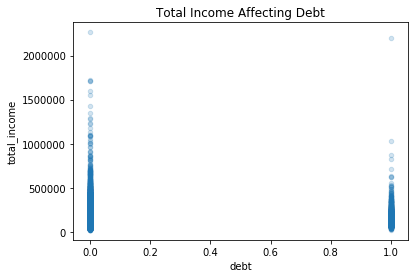

In [90]:
df.plot('debt', 'total_income', kind='scatter', title='Total Income Affecting Debt', alpha=0.2)

In [91]:
pd.pivot_table(df, index='income_category', values='debt', aggfunc=sum)

,debt
income_category,
Bottom Income,23
Low Income,331
Middle Income,491
Top Income,358
Upper Income,368


In [92]:
bottom = df[df['income_category'] == 'Bottom Income'].count()

In [93]:
print(76 / bottom[1])

0.20430107526881722


In [94]:
print(bottom[1])

372


In [95]:
low = df[df['income_category'] == 'Low Income'].count()

In [96]:
print(76 / low[1])

0.018577364947445614


In [97]:
middle = df[df['income_category'] == 'Middle Income'].count()

In [98]:
print(76 / middle[1])

0.01332398316970547


In [99]:
top = df[df['income_category'] == 'Top Income'].count()

In [100]:
print(76 / top[1])

0.015001973943939992


In [101]:
upper = df[df['income_category'] == 'Upper Income'].count()

In [102]:
print(76 / upper[1])

0.018455560951918408


### Conclusion

From both our graph and pivot table, we can see here that income has a very weak relationship to debt repayment. Specifically, we can see there is a larger concentraton of loans to those in the lower and middle income tiers for both repayment and defaults. We can see this both with the pearson correlation and with the scatterplot. 

And, when we look at those who did default vs. those who didn't, we see more often than not those at higher income levels didn't default. However, there is definitely a higher number of defaults among the upper and top income levels. 

When we dig into this and look at percentages, we do see a very slight increase in percentage of defaults for those in upper and lower income levels. This suggests those above or below the mean income can be at risk. But, the difference is negligible. Instead, the big risk here is for those on the bottom income level, where 20% of the people default. Still, since there are only a few hundred in this category, I'd like additional data points to really determine if this holds true at higher levels. 

- How do different loan purposes affect on-time repayment of the loan?

In [103]:
pearsonr(df['purpose'], df['debt'])

(-0.007807649471543341, 0.2774560341795818)

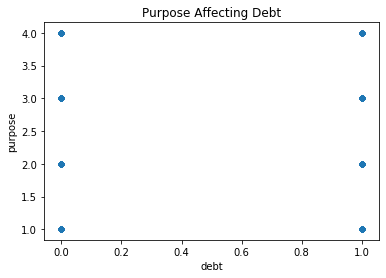

In [104]:
df.plot('debt', 'purpose', kind='scatter', title='Purpose Affecting Debt', alpha=0.1)

In [105]:
pd.pivot_table(df, index='purpose', values='debt', aggfunc=sum)

,debt
purpose,
1,367
2,715
3,331
4,158


In [106]:
car = df[df['purpose'] == 1].count()

In [107]:
print(367 / car[1])

0.09417500641519118


In [108]:
house = df[df['purpose'] == 2].count()

In [109]:
print(715 / house[1])

0.07327321172371387


In [110]:
education = df[df['purpose'] == 3].count()

In [111]:
print(331 / education[1])

0.09202112871837642


In [112]:
wedding = df[df['purpose'] == 4].count()

In [113]:
print(158 / wedding[1])

0.07527393997141496


### Conclusion

There doesn't seem to be much of a relationship at first glance. We can see this both with the pearson correlation and with the scatterplot. Once again, our pivot table seems to offer the most insight. We can see that home loans are the most often defaulted on. However, when we dig into ratios, we see this is because there are a larger number of loans recorded for housing purposes. Instead, it looks like car loans are the most often defaulted on, followed closely by education. 

### Step 4. General conclusion

Overall, we can see in each of the examined qualities how likely they were to default on a loan. We found that those with 2-3 kids are more likely to default. And, though the sample size was small, we also found those with 20 kids are the most likely to default. From there, we see car and education loans are the most likely to default. And, we also see unmarried people are more likely. For income, it looks like the lowest income level is most at risk, but the sample size for these loans is relatively small too, so more data might be helpful. 

I hope later in my education I can revisit this data and perform some additional exploration in terms of interrelationships between the variables. Perhaps even see if I could create an effective machine learning model that could predict liklihood of defaulting based on these paramters. 